## Mentor session - Logit - Credit Risk

 
### Domain: Banking

 
#### Context:
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, ducation, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Attribute Information:
- Loan_ID: Unique Loan ID
- Gender: Male/ Female
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant Education (Graduate/ Under Graduate)
- Self_Employed: Self employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Coapplicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: credit history meets guidelines (yes or no) i.e (1 or 0)
- Property_Area: Urban/ Semi Urban/ Rural
- Loan_Status: Loan approved (Y/N)
 
 
#### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation
 
 
#### Steps and Tasks:
- Import Libraries and Load Dataset
- EDA (Univariate Analysis, Null Values Treatment, Bivariate Analysis)
- Model Building (using Sklearn) and check model performance using various metrics for classification.
- Improving Model Performance via Checking Parameters of Logistic Regression Sklearn
- Business Insights

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(style='darkgrid')

import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='newton-cg')

from sklearn import metrics as mtr
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 62.4+ KB


In [4]:
df.rename(columns={'Loan_ID':'LoanID','Self_Employed':'SelfEmployed','Loan_Amount_Term':'LoanAmountTerm',
                   'Credit_History':'CreditHistory','Property_Area':'PropertyArea','Loan_Status':'LoanStatus'},inplace=True)
df.head(25)

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.00,0,360.00,1.00,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128,360.00,1.00,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66,360.00,1.00,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120,360.00,1.00,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141,360.00,1.00,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,"4,196.00",267,360.00,1.00,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,"1,516.00",95,360.00,1.00,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,"2,504.00",158,360.00,0.00,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,"1,526.00",168,360.00,1.00,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,"10,968.00",349,360.00,1.00,Semiurban,0


In [5]:
df.isnull().sum()

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [6]:
df.nunique()

LoanID               614
Gender                 2
Married                2
Dependents             4
Education              2
SelfEmployed           2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
LoanAmountTerm        10
CreditHistory          2
PropertyArea           3
LoanStatus             2
dtype: int64

In [7]:
df[df==0].count()

LoanID                 0
Gender                 0
Married                0
Dependents             0
Education              0
SelfEmployed           0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount            22
LoanAmountTerm         0
CreditHistory         89
PropertyArea           0
LoanStatus           192
dtype: int64

#### Preparing Data

In [8]:
# Dropping observations where LoanAmount is zero

df.drop(df[df.LoanAmount == 0].index, inplace=True)

In [9]:
# Dropping LoanAmountTerm since 85% of the data is same - no variance to have impact on model

df.drop('LoanAmountTerm',axis=1, inplace=True)

In [10]:
# Substituting null values for Married status based on logic on co-applicant information

df.Married[df.Married.isnull() & (df.CoapplicantIncome > 0)] = 'Yes'
df.Married[df.Married.isnull() & (df.CoapplicantIncome == 0)] = 'No'


In [11]:
df[df==0].count()

LoanID                 0
Gender                 0
Married                0
Dependents             0
Education              0
SelfEmployed           0
ApplicantIncome        0
CoapplicantIncome    261
LoanAmount             0
CreditHistory         85
PropertyArea           0
LoanStatus           181
dtype: int64

In [12]:
df.isnull().sum()

LoanID                0
Gender               13
Married               0
Dependents           13
Education             0
SelfEmployed         31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
CreditHistory        49
PropertyArea          0
LoanStatus            0
dtype: int64

In [13]:
df1=df.copy()

In [14]:
df1.drop(df1[df1.Gender.isnull()].index,inplace=True)

In [15]:
df1.drop(df1[df1.Dependents.isnull()].index,inplace=True)

In [16]:
df1.drop(df1[df1.SelfEmployed.isnull()].index,inplace=True)

In [17]:
df1.isnull().sum()

LoanID                0
Gender                0
Married               0
Dependents            0
Education             0
SelfEmployed          0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
CreditHistory        43
PropertyArea          0
LoanStatus            0
dtype: int64

In [18]:
df1 = df1.fillna(value=1)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 12 columns):
LoanID               535 non-null object
Gender               535 non-null object
Married              535 non-null object
Dependents           535 non-null object
Education            535 non-null object
SelfEmployed         535 non-null object
ApplicantIncome      535 non-null int64
CoapplicantIncome    535 non-null float64
LoanAmount           535 non-null int64
CreditHistory        535 non-null float64
PropertyArea         535 non-null object
LoanStatus           535 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 54.3+ KB


In [20]:
df1.CoapplicantIncome = df1.CoapplicantIncome.astype('int64')

In [21]:
df1 = df1.drop('LoanID',axis=1).copy()

In [22]:
df1 = pd.get_dummies(df1)

In [23]:
df1[df1==1].sum()

ApplicantIncome            0.00
CoapplicantIncome          0.00
LoanAmount                 0.00
CreditHistory            459.00
LoanStatus               373.00
Gender_Female             99.00
Gender_Male              436.00
Married_No               186.00
Married_Yes              349.00
Dependents_0             309.00
Dependents_1              91.00
Dependents_2              91.00
Dependents_3+             44.00
Education_Graduate       419.00
Education_Not Graduate   116.00
SelfEmployed_No          462.00
SelfEmployed_Yes          73.00
PropertyArea_Rural       157.00
PropertyArea_Semiurban   207.00
PropertyArea_Urban       171.00
dtype: float64

In [24]:
df1.drop(['Gender_Female','Married_No','Education_Not Graduate','SelfEmployed_Yes'],axis=1,inplace=True)

In [25]:
for col in df1.columns[3:,]:
    df1[col] = df1[col].astype('category')

In [26]:
dfy=df1[['LoanStatus']].copy()
dfX=df1.drop('LoanStatus',axis=1).copy()

In [27]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 15 columns):
ApplicantIncome           535 non-null int64
CoapplicantIncome         535 non-null int64
LoanAmount                535 non-null int64
CreditHistory             535 non-null category
Gender_Male               535 non-null category
Married_Yes               535 non-null category
Dependents_0              535 non-null category
Dependents_1              535 non-null category
Dependents_2              535 non-null category
Dependents_3+             535 non-null category
Education_Graduate        535 non-null category
SelfEmployed_No           535 non-null category
PropertyArea_Rural        535 non-null category
PropertyArea_Semiurban    535 non-null category
PropertyArea_Urban        535 non-null category
dtypes: category(12), int64(3)
memory usage: 24.1 KB


In [28]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 1 columns):
LoanStatus    535 non-null category
dtypes: category(1)
memory usage: 4.8 KB


In [29]:
X_tr, X_ts, y_tr, y_ts = tts(dfX,dfy,test_size=0.3, random_state=15)

In [30]:
y_tr.LoanStatus.value_counts(normalize=True)*100

1   69.79
0   30.21
Name: LoanStatus, dtype: float64

In [31]:
y_ts.LoanStatus.value_counts(normalize=True)*100

1   69.57
0   30.43
Name: LoanStatus, dtype: float64

In [32]:
logit = LogisticRegression(random_state=4294967295,fit_intercept=False)
logit.fit(X_tr,y_tr)
print('Training score : ',logit.score(X_tr, y_tr))

logit.fit(X_ts,y_ts)
print('Testing score : ',logit.score(X_ts, y_ts))

Training score :  0.8128342245989305
Testing score :  0.8260869565217391


In [33]:
dfcmpr = y_ts.copy()
dfcmpr['Predicted'] = logit.predict(X_ts)

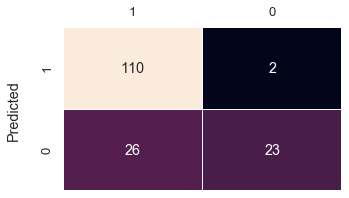

In [34]:
y_pred = logit.predict(X_ts)
cmat = mtr.confusion_matrix(y_ts,y_pred, labels=[1,0])
dfcm = pd.DataFrame(cmat, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()


In [35]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [36]:
npcm = np.array(cmat)
print('Accuracy of the model : ',npcm.trace()/npcm.sum())
print('Recall of the model : ',npcm[0,0]/npcm[:,0].sum())
print('Precision of the model : ',npcm[0,0]/npcm[0].sum())
print("F1 Score:",f1_score(y_ts,y_pred))
print("Roc Auc Score:",roc_auc_score(y_ts,y_pred))

Accuracy of the model :  0.8260869565217391
Recall of the model :  0.8088235294117647
Precision of the model :  0.9821428571428571
F1 Score: 0.8870967741935484
Roc Auc Score: 0.7257653061224489


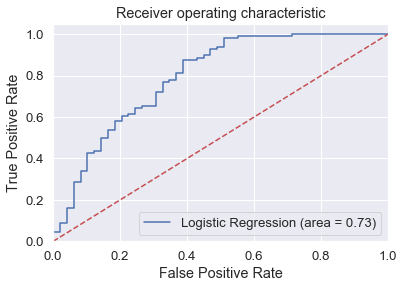

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_ts, logit.predict(X_ts))
fpr, tpr, thresholds = roc_curve(y_ts, logit.predict_proba(X_ts)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
logit.fit(X_ts,y_ts)
dfcoef = pd.DataFrame({'Attributes':list(X_ts.columns),'Coefficient':list(abs(logit.coef_[0]))})
dfcoef.sort_values('Coefficient', ascending=False)

,Attributes,Coefficient
3,CreditHistory,2.40
5,Married_Yes,0.72
12,PropertyArea_Rural,0.50
11,SelfEmployed_No,0.48
14,PropertyArea_Urban,0.34
6,Dependents_0,0.32
13,PropertyArea_Semiurban,0.22
9,Dependents_3+,0.21
4,Gender_Male,0.18
10,Education_Graduate,0.10


In [47]:
smX_tr = sm.add_constant(X_tr)
smy_tr = y_tr.LoanStatus.astype('int8')
for col in smX_tr.columns[4:,]:
    smX_tr[col] = smX_tr[col].astype('int8')
smlogit = sm.Logit(smy_tr, smX_tr)
smlg = smlogit.fit()
smlg.summary2()

Optimization terminated successfully.
         Current function value: 0.452181
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                   Pseudo R-squared:        0.262     
Dependent Variable:          LoanStatus              AIC:                     366.2313  
Date:                        2020-11-03 00:28        BIC:                     421.1709  
No. Observations:            374                     Log-Likelihood:          -169.12   
Df Model:                    13                      LL-Null:                 -229.14   
Df Residuals:                360                     LLR p-value:             1.9746e-19
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                        Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------------------
const                  -1.6364 14311750.2484 -0.0000 1.0000 -28050516.6790 28050513.4062
ApplicantIncome         0.0000        0.0000  0.4555 0.6488        -0.0001        0.0001
CoapplicantIncome      -0.0001        0.0000 -1.6153 0.1062        -0.0002        0.0000
LoanAmount             -0.0026        0.0021 -1.2244 0.2208        -0.0067        0.0016
CreditHistory           3.7543        0.5086  7.3824 0.0000         2.7576        4.7511
Gender_Male             0.1248        0.3851  0.3241 0.7458        -0.6299        0.8795
Married_Yes             0.3566        0.3350  1.0645 0.2871        -0.2999        1.0131
Dependents_0           -0.3716           nan     nan    nan            nan           nan
Dependents_1           -1.1266           nan     nan    nan            nan           nan
Dependents_2            0.0424           nan     nan    nan            nan           nan
Dependents_3+          -0.1806           nan     nan    nan            nan           nan
Education_Graduate      0.3894        0.3447  1.1296 0.2586        -0.2863        1.0651
SelfEmployed_No         0.0118        0.4096  0.0287 0.9771        -0.7910        0.8145
PropertyArea_Rural     -1.0059  2022046.6763 -0.0000 1.0000  -3963139.6664  3963137.6547
PropertyArea_Semiurban -0.0803  2022046.6763 -0.0000 1.0000  -3963138.7409  3963138.5802
PropertyArea_Urban     -0.5502  2022046.6763 -0.0000 1.0000  -3963139.2107  3963138.1103
========================================================================================

"""